In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Чтение изображения

In [2]:
img_start = cv.imread('image.jpg')

Поворот изображения

In [3]:
(h, w, g) = img_start.shape
angle = -58
scale = 1
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
img_rotate = cv.warpAffine(img_start, M, (w, h))

Кадрирование изображения

(331, 339, 3)


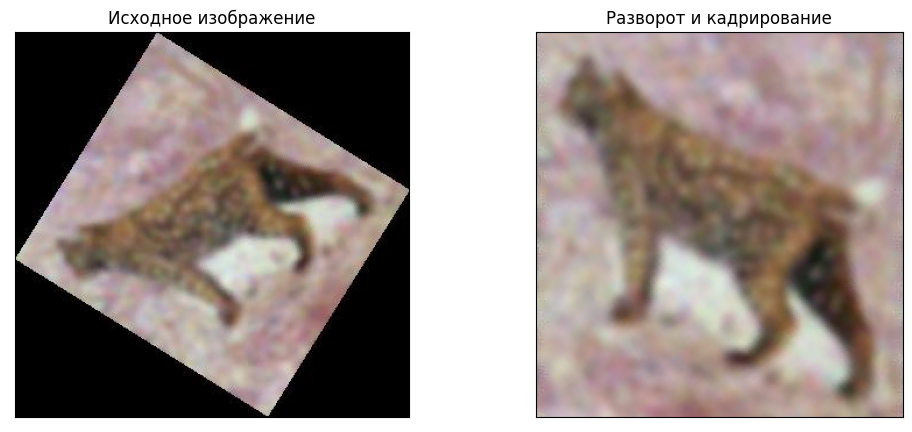

In [4]:
print((h, w, g))
ROI = (55, 45, w - 110, 240)
img_rotate = img_rotate[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]

#Вывод изображений
gs = plt.GridSpec(1, 2)
plt.figure(figsize=(12, 5))
plt.subplot(gs[0, 0]), plt.imshow(img_start)
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[0, 1]), plt.imshow(img_rotate)
plt.title('Разворот и кадрирование'), plt.xticks([]), plt.yticks([])
plt.show()

Применение медианного фильтра иповышение резкости ядром 1

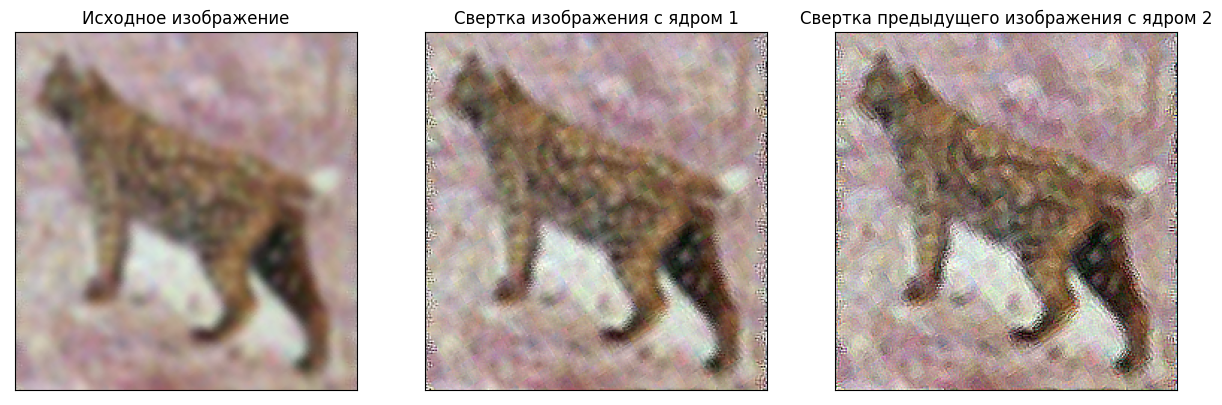

In [5]:
kernel1 = np.asarray([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
kernel2 = np.asarray([[-0.25, -0.25, -0.25], [-0.25, 3, -0.25], [-0.25, -0.25, -0.25]])
kernel3 = np.asarray([[0, -0.25, 0], [-0.25, 2, -0.25], [0, -0.25, 0]])

image_median = cv.medianBlur(img_rotate, 3)

filtered_image = cv.filter2D(img_rotate, -1, kernel1)
filtered_image_median = cv.filter2D(image_median, -1, kernel1)
filtered_image_median = cv.filter2D(filtered_image_median, -1, kernel2)

#Вывод изображений
gs = plt.GridSpec(1, 3)
plt.figure(figsize=(15, 17))
plt.subplot(gs[0, 0]), plt.imshow(img_rotate)
plt.title('Исходное изображение'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[0, 1]), plt.imshow(filtered_image)
plt.title('Свертка изображения с ядром 1'), plt.xticks([]), plt.yticks([])
plt.subplot(gs[0, 2]), plt.imshow(filtered_image_median)
plt.title('Свертка предыдущего изображения с ядром 2'), plt.xticks([]), plt.yticks([])
plt.show()